# Flowers App
> Building an app using iPython widgets, voila and binder!

- toc: true
- branch: master
- badges: true
- comments: true
- author: Harish Vadlamani
- categories: []

In [3]:
%%javascript
$('.nbp-app-bar').toggle()

<IPython.core.display.Javascript object>

In [26]:
from data.utils import *
from fastai2.vision.all import *
from fastai2.vision.widgets import *
%matplotlib inline

## Re-loading flowers-resnet50 model

In [4]:
from fastai2.callback.fp16 import *

path = untar_data(URLs.FLOWERS)
df = pd.read_csv('data/df.csv', index_col=0)


item_tfms=Resize(460),
batch_tfms=aug_transforms(size=224, min_scale=0.75)

def get_x(r): return path/r['name']
def get_y(r): return r['class']

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(seed=42),
                   get_x= get_x,
                   get_y= get_y, 
                   item_tfms = item_tfms,
                   batch_tfms = batch_tfms)
dls = dblock.dataloaders(df) 

learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.load('flowers-resnet50')

## Model Inference

In [5]:
learn.export()

In [8]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [9]:
learn_inf = load_learner(path/'export.pkl')

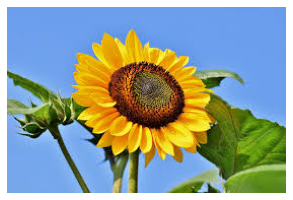

In [12]:
# img = PILImage.create('images/sunflower.jpg')
# img.show()

In [13]:
learn_inf.predict('images/sunflower.jpg')

(' sunflower',
 tensor(85),
 tensor([1.9858e-07, 2.9803e-08, 7.5179e-09, 2.3806e-07, 1.1462e-09, 1.0572e-08, 7.2958e-08, 2.2056e-05, 3.0789e-07, 3.1159e-08, 2.1893e-07, 1.1915e-08, 5.0990e-07, 9.9622e-10, 2.5528e-08, 5.9598e-09,
         2.7808e-08, 2.2950e-08, 9.8164e-08, 1.6309e-09, 7.1804e-09, 1.6773e-07, 1.6460e-09, 6.3874e-09, 5.2016e-08, 1.2621e-09, 1.0314e-09, 1.1879e-07, 1.2712e-07, 2.5720e-08, 8.1913e-09, 2.7316e-06,
         7.0389e-10, 1.2418e-07, 1.2707e-07, 7.1373e-10, 7.0219e-07, 1.1554e-07, 9.7313e-09, 2.1288e-08, 1.8767e-07, 5.8858e-10, 1.3825e-06, 3.3135e-07, 1.2464e-06, 8.5026e-09, 1.5000e-08, 3.7068e-07,
         8.3815e-09, 8.0262e-08, 2.4305e-06, 1.0220e-07, 5.5806e-08, 4.7732e-08, 3.7120e-09, 1.0267e-08, 1.9166e-07, 1.9835e-07, 5.3492e-08, 7.2404e-09, 3.3678e-07, 2.0292e-07, 3.8008e-08, 1.4967e-08,
         2.4744e-08, 1.6266e-05, 1.3708e-08, 3.8701e-08, 1.1565e-08, 9.8164e-10, 3.7157e-08, 6.4693e-09, 2.5203e-09, 9.8077e-09, 8.0419e-09, 7.9977e-07, 3.5180e-09, 1.0

In [10]:
learn_inf.dls.vocab

(#102) [' "colts foot"',' alpine sea holly',' anthurium',' artichoke',' azalea',' ball moss',' balloon flower',' barbeton daisy',' bearded iris',' bee balm'...]

## Creating notebook app of the model
> Using IPython widgets 

In [50]:
# upload widget
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [51]:
img = PILImage.create(btn_upload.data[-1])

In [52]:
# Output widget
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [53]:
# Label widget
lbl_pred = widgets.Label()
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction:  sunflower; Probability: 0.9999')

In [54]:
# Classify button widget
btn_run = widgets.Button(description='Classify')
btn_run

# This by itself does nothing

Button(description='Classify', style=ButtonStyle())

In [55]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [61]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

VBox([widgets.Label('Upload an image of a flower you want classified!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

---

## Turning notebook into real app using voila

In [65]:
# !pip install voila
# !jupyter serverextension enable voila --sys-prefix

Voilà runs Jupyter notebooks, just like the Jupyter notebook server you are using now does, except that it does something very important: it removes all of the cell inputs, and only shows output (including ipywidgets), along with your markdown cells. So what's left is a web application! To view your notebook as a voila web application replace the word "notebooks" in your browser's URL with: "voila/render". You will see the same content as your notebook, but without any of the code cells.

---